Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$

where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.


(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 

$$ \hat{H}_I = \hbar\begin{pmatrix}0 & 0 & \Omega_0/2 \\\ 0 & 0 & \Omega_1/2\\\ \Omega_0/2 & \Omega_1/2 & \Delta \end{pmatrix} .$$

(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

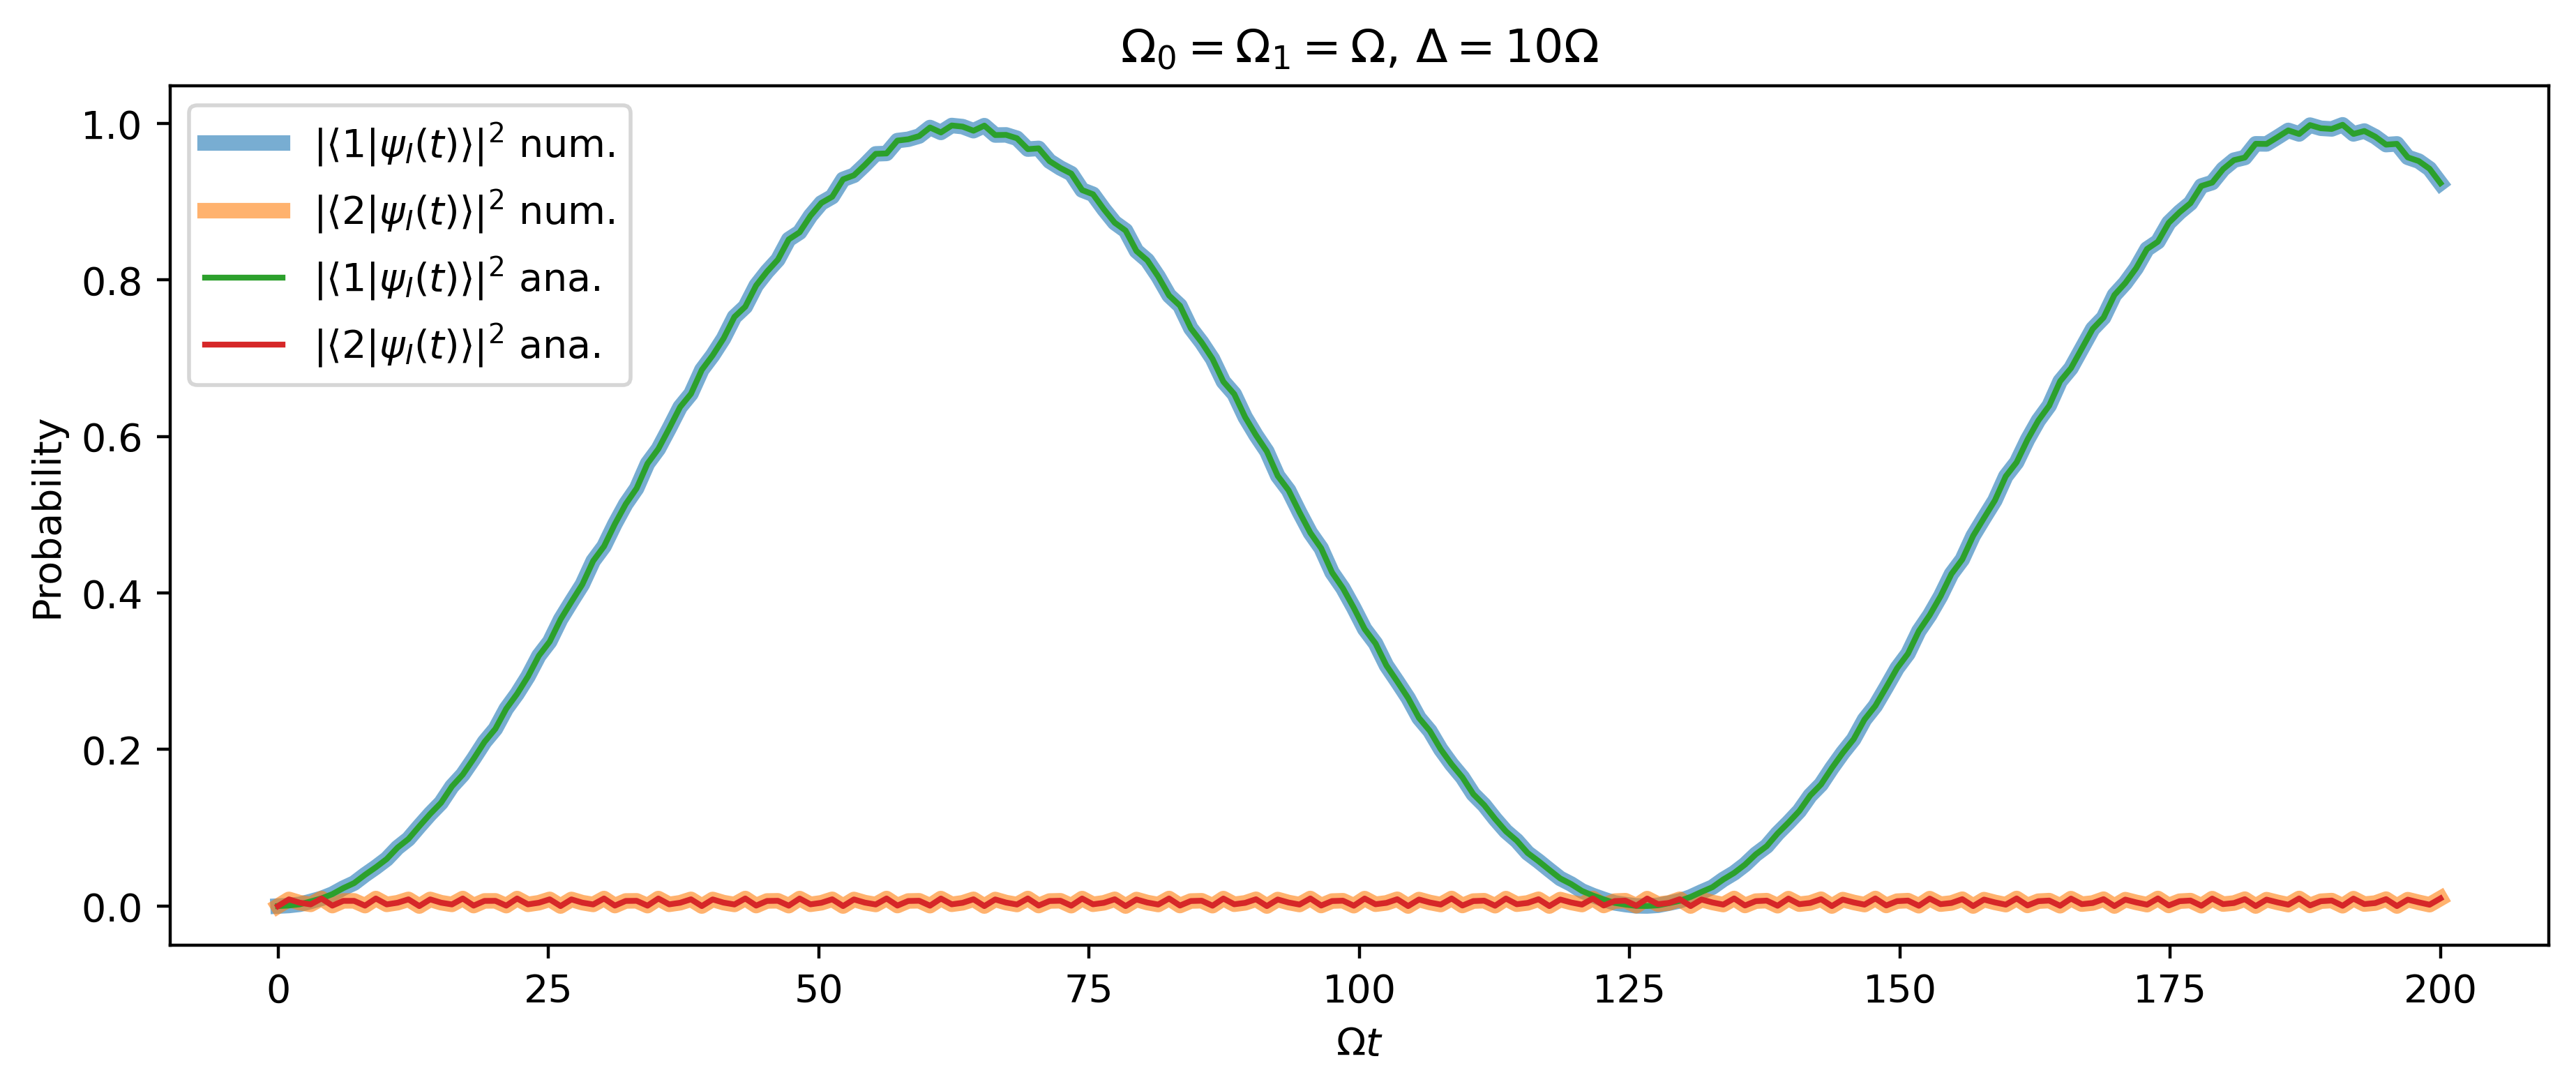

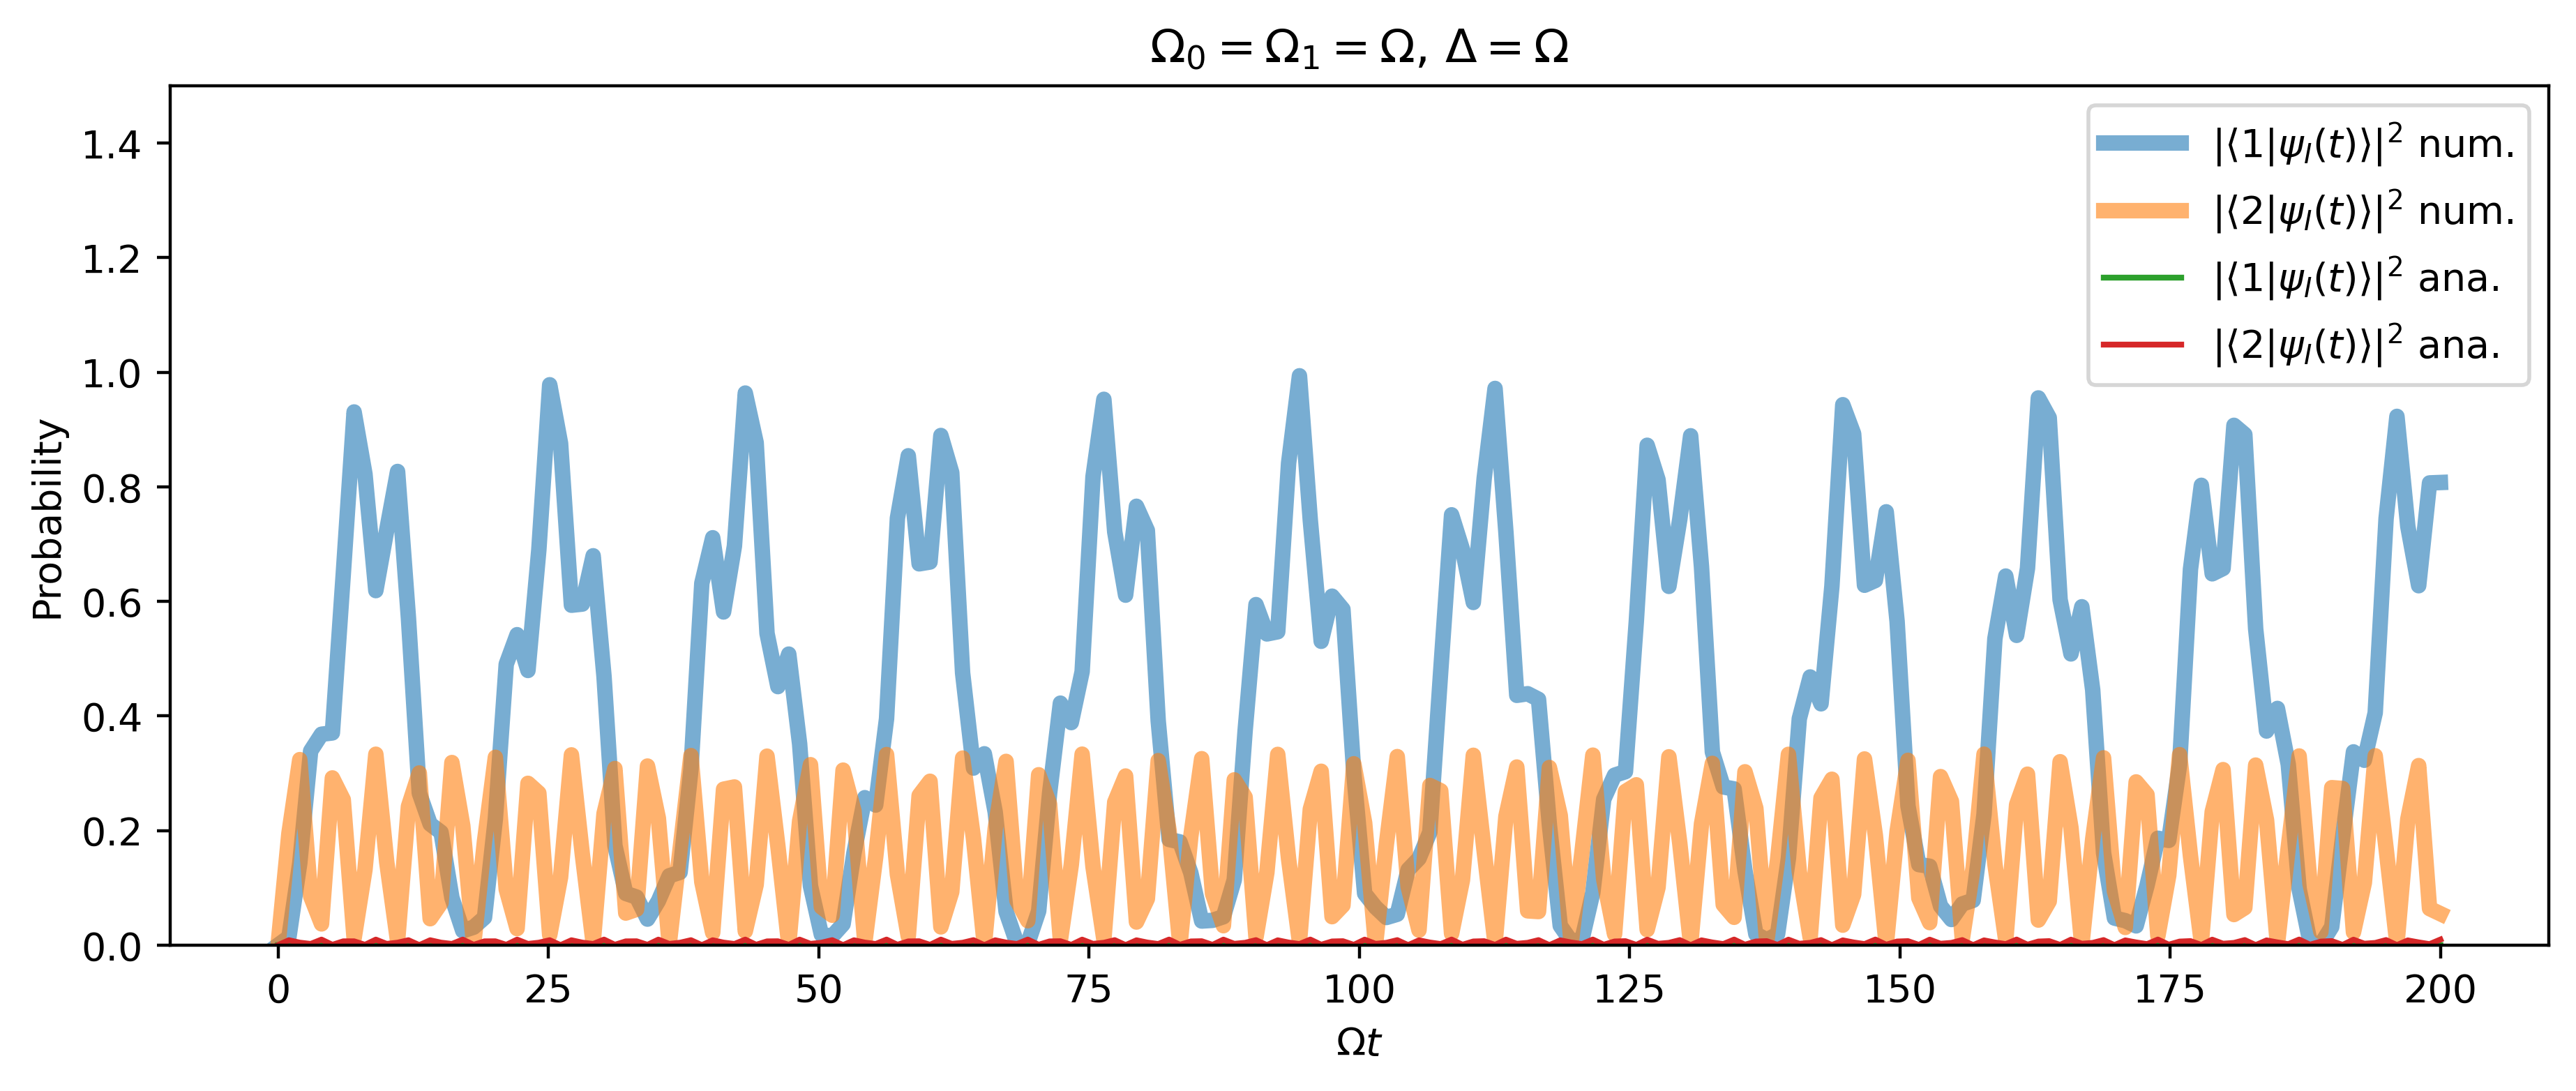

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
#defining values
omega = 1
omega_0 = omega
omega_1 = omega
D = 10*omega #delta
omega_eff = np.sqrt(omega_0**2+omega_1**2 + D**2)
t_f = 200
N = 200
t = np.linspace(0, t_f, N)
initial_state = np.array([[1],
                          [0],
                          [0]])
system_states = [initial_state, np.array([[0], [1], [0]]), np.array([[0], [0], [1]])]

#hamiltonian
def H():
    return np.array([[0, 0, omega_0/2], [0, 0, omega_1/2], [omega_0/2, omega_1/2, D]])

#evolution operator
def unitary_evolution(time, vector):
    return expm(-1j * time * H()) @ vector

#funciton that calculates the expectation value
def expectation_value(state, operator):
    expect = state.T.conjugate() @ operator @ state
    return float(expect.real)

#calculate the probability of measing system state in current state
def population_probability(system_state, current_state):
    braket = complex(system_state.T.conjugate() @ current_state)
    probability = braket.conjugate() * braket #modulus squared of the complex number of the inner product between the system and the current states
    return probability.real

def pop1(time):
    term1 = (omega_0*omega_1)**2
    term2 = D**2 * (1-np.cos(omega_eff*time))
    term3 = omega_eff**2 * (3+np.cos(omega_eff*time))
    term4 = -3*omega_eff * (omega_eff * np.cos(omega_eff *time / 2)*np.cos(D*time/2) + D*np.sin(omega_eff * time/2)*np.sin(D*time/2))
    term5 = 2 * omega_eff ** 2 * (D+omega_eff)**2 * (omega_eff - D) ** 2
    z = omega_0*omega_1 * (np.exp(-1j * (D+omega_eff)/2*time)/(2*omega_eff*(omega_eff+D)) + np.exp(-1j * (D-omega_eff)/2*time)/(2*omega_eff*(omega_eff-D)) - 1/(omega_eff**2-D**2))
    zz = z.conjugate() * z
    x = (omega_0*omega_1)**2*(6*omega_eff**2+2*D**2+2*np.cos(omega_eff*time)*(omega_eff**2-D**2)-4*omega_eff*(omega_eff*(np.cos((D+omega_eff)/2*time)+np.cos((D-omega_eff)/2*time))+D*(np.cos((D-omega_eff)/2*time) -np.cos((D+omega_eff)/2*time))))/((2*omega_eff)**2*(omega_eff**2-D**2)**2)
    return x
def pop2(time):
    return omega_0 ** 2 / (2*omega_eff**2)*(1-np.cos(omega_eff * time))

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [population_probability(system_states[1], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 1 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [population_probability(system_states[2], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 2 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [pop1(i) for i in t], label=r'$|\langle 1 | \psi_I(t)\rangle|^2$ ana.')
plt.plot(t, [pop2(i) for i in t], label=r'$|\langle 2 | \psi_I(t)\rangle|^2$ ana.')
plt.ylabel('Probability')
plt.xlabel(r'$\Omega t$')
plt.title(r'$\Omega_0 = \Omega_1 = \Omega$, $\Delta = 10\Omega$')
plt.legend()
#plt.savefig('7i.pdf', dpi=400)

plt.show()

D = omega #second case
O_eff = np.sqrt(omega_0**2 + omega_1**2 + D**2)
plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [population_probability(system_states[1], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 1 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [population_probability(system_states[2], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 2 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [pop1(i) for i in t], label=r'$|\langle 1 | \psi_I(t)\rangle|^2$ ana.')
plt.plot(t, [pop2(i) for i in t], label=r'$|\langle 2 | \psi_I(t)\rangle|^2$ ana.')
plt.ylabel('Probability')
plt.xlabel(r'$\Omega t$')
plt.title(r'$\Omega_0 = \Omega_1 = \Omega$, $\Delta = \Omega$')
plt.ylim((0,1.5))
plt.legend()

plt.show()



It can be seen that when detuning $\Delta$ is much bigger than the rabi frequency $\omega$, system state 1 undergoes rabi oscillations between state $|0\rangle$ and $|1\rangle$, and system state 2 is barely populated. However, at $\Delta$ = $\omega$, ideal behavior disappears and rabi frequencies break down. 